# Autoencoder Project

#### For the course Complete Tensorflow 2 and Keras Deeplearning Bootcamp

The aim of the project is determine if, given a dataset of average eating habits between countries in the UK, any particular country stand out as different. For this we will use autoencoder to reduce dimensionality and help us identify the country with particular eating habits.

In [1]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
habits_df = pd.read_csv("data/UK_foods.csv", index_col="Unnamed: 0")
habits_df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [3]:
habits_df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


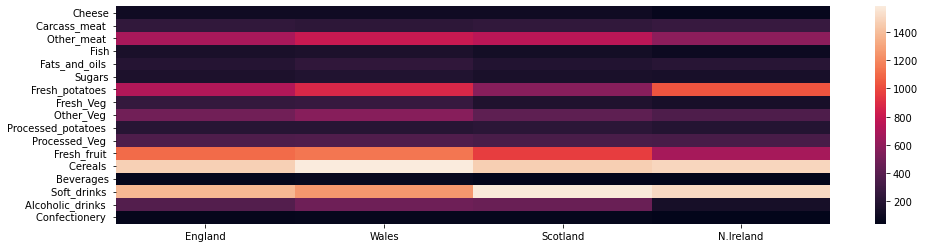

In [4]:
plt.figure(figsize=(16, 4))
sns.heatmap(habits_df);

In [5]:
habits_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Cheese to Confectionery 
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   England    17 non-null     int64
 1   Wales      17 non-null     int64
 2   Scotland   17 non-null     int64
 3   N.Ireland  17 non-null     int64
dtypes: int64(4)
memory usage: 1.2+ KB


## Creating an autoencoder

We will create a model to reduce dimensionality from 17 features => 8 (half) => 4 (half) => 2

In [6]:
# Imports for the autoencoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [7]:
# First the encoder

encoder = Sequential()
encoder.add(Dense(units=8, input_shape=[17], activation="relu"))
encoder.add(Dense(units=4, input_shape=[8], activation="relu"))
encoder.add(Dense(units=2, input_shape=[4], activation="relu"))

In [8]:
# Now the decoder

decoder = Sequential()
decoder.add(Dense(units=4, input_shape=[2], activation="relu"))
decoder.add(Dense(units=8, input_shape=[4], activation="relu"))
decoder.add(Dense(units=17, input_shape=[8], activation="relu"))

In [9]:
# Creation of the autoencoder

autoencoder = Sequential([encoder, decoder])

# Compilation

autoencoder.compile(loss="mse", optimizer=SGD(learning_rate=1.5))

## Scaling of the data

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(habits_df.transpose().values) # transpose because is expecting 17 features

In [11]:
scaled_data

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

## Fitting the autoencoder

In [12]:
autoencoder.fit(scaled_data, scaled_data, epochs=15)

Epoch 1/15
1/1 [==============================] - 0s 465ms/step - loss: 0.3638
Epoch 2/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3054
Epoch 3/15
1/1 [==============================] - 0s 3ms/step - loss: 0.3081
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2976
Epoch 5/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3140
Epoch 6/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2895
Epoch 7/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2927
Epoch 8/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2883
Epoch 9/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2932
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2865
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2926
Epoch 12/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2847
Epoch 13/15
1/1 [==============================] - 0s 4ms/step - loss: 

## Using the encoder 

We can use the encoder over the scaled data. The results would be use the results to try to identify the country with differne

In [13]:
encoded_2dim = encoder.predict(scaled_data)
encoded_2dim

1/1 [==============================] - 0s 89ms/step


array([[1.7704219 , 0.        ],
       [2.7474108 , 0.        ],
       [1.4556267 , 0.        ],
       [0.23775744, 0.        ]], dtype=float32)

In [14]:
habits_df.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [15]:
results = pd.DataFrame(data=encoded_2dim, index=habits_df.transpose().index, columns=['C1','C2'])
results = results.reset_index()
results

,index,C1,C2
0,England,1.770422,0.0
1,Wales,2.747411,0.0
2,Scotland,1.455627,0.0
3,N.Ireland,0.237757,0.0


<AxesSubplot:xlabel='C1', ylabel='C2'>

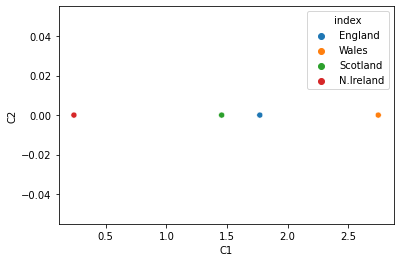

In [16]:
sns.scatterplot(x="C1", y="C2", data=results, hue="index")